In [31]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt # set figure size and font
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 18

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dry demo (from existing data)
## 1-qubit circuit
### Measuring 0 or 1 -> are we detecting a photon?
What does the output look like if we send a single qubit through this interferometer circuit: <br>
(circuit diagram) <br>
For each data point, we ran this experiment with 1024 shots (1 qubit at a time) and counted how many 0's and 1's we measured at the output. We repeated this experiment a few times (a total of 5 trials) for each value of $\phi$.

In [32]:
# Load existing data
num0 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_0s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num1 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_1s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))

`num0` and `num1` correspond to the number of times we measure 0 or 1 at the circuit output. Both `num0` and `num1` are 2D arrays with 13 rows and 5 columns. Each row corresponds to a value of $\phi$ ranging from 0 to $2\pi$ radians (or 0 to 360 degrees, if you like). <br>
This is what the top row ($\phi=0$) of `num1` looks like:

In [33]:
num1[0, :]

array([10.,  6.,  4.,  6.,  7.])

In [34]:
# the sum of num1 + num0 is always equal to 1024 (total number of shots)
num0[0, :]

array([1014., 1018., 1020., 1018., 1017.])

This means that at $\phi=0$ (no gravitational wave), when we sent 1024 photons through the interferometers, we **barely detected any photons** at the output. On the other hand, at $\phi=\pi=180^\circ$, the data look very different -- most photons are detected!

In [35]:
num1[6, :]

array([964., 959., 959., 977., 950.])

### Let's plot the data!
To better see the trends in `num0` and `num1`, we can plot both values as a function of $\phi$. Since we have 5 data points at each value of $\phi$, we can take the average from 5 trials

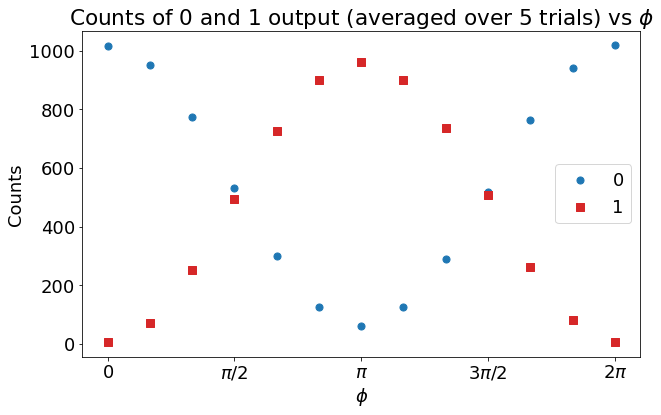

In [36]:
phi = np.linspace(0, 2*np.pi, 13)
mean0 = np.mean(num0, axis=1) # averaged over 5 trials at each phi
mean1 = np.mean(num1, axis=1) # averaged over 5 trials at each phi

fig, ax = plt.subplots()
plt.scatter(phi, mean0, label="0", s=50)
plt.scatter(phi, mean1, label="1", s=50, color="C3", marker="s")
plt.legend()
ax.set_ylabel("Counts")
ax.set_xlabel("$\phi$")
plt.title("Counts of 0 and 1 output (averaged over 5 trials) vs $\phi$")

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

Here we used 1024 shots, but this number can change. Let's convert our results into probabilities (divide `num0` and `num1` by 1024) and see how well they agree with the theoretical values $\cos^2{(\phi/2)}$ and $\sin^2{(\phi/2)}$ that we calculated.

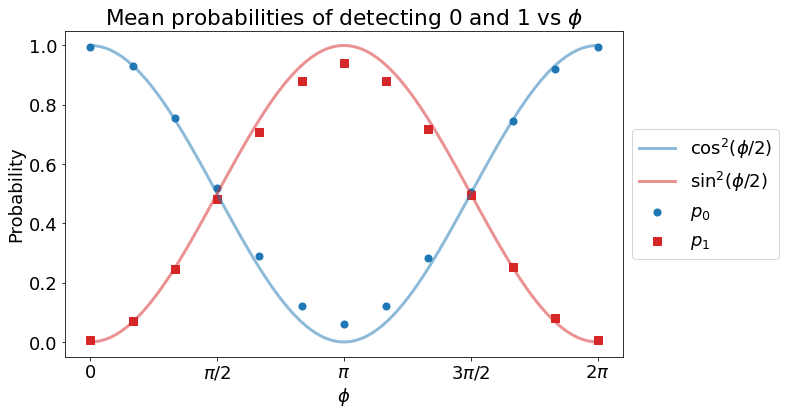

In [37]:
phi = np.linspace(0, 2*np.pi, 13)
p0 = np.mean(num0, axis=1) / 1024 # calculate probability p0 (divide count by 1024)
p1 = np.mean(num1, axis=1) / 1024 # calculate probability p1 (divide count by 1024)

fig, ax = plt.subplots()
plt.scatter(phi, p0, label="$p_0$", s=50)
plt.scatter(phi, p1, label="$p_1$", s=50, color="C3", marker="s")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, np.cos(phi_rad/2)**2, lw=3, alpha=0.5, label="$\cos^2{(\phi/2)}$")
plt.plot(phi_rad, np.sin(phi_rad/2)**2, lw=3, alpha=0.5, color="C3", label="$\sin^2{(\phi/2)}$")

ax.set_ylabel("Probability")
ax.set_xlabel("$\phi$")
plt.title("Mean probabilities of detecting 0 and 1 vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

### What do we see from the above plot?
1. At $\phi=0, 2\pi$ (no gravitational wave), $p_1$ is near zero whereas $p_0$ is near maximum. This means most photons do not reach the detector!
2. At other values of $\phi$ (there is gravitational wave!), some photons will reach the detector.
3. Remember that total probability $p_0 + p_1 = 1$
4. There are slight differences between experimental data and theory curves. Why?

## Can we guess $\phi$ from experimental data?
Because the probabilities $p_0, p_1$ depend on $\phi$ and we know the relationship between the probabilities and $\phi$, we can "guess" the value of $\phi$ ($\phi$ is unknown for a real detection at LIGO) based on $p_0$ and $p_1$ that we measure. Let's try this now!

Before we proceed, let's define a new parameter that combines $p_0$ and $p_1$! <br>
We'll call it $P$ for polarization and let $P = p_1 - p_0$ define the difference between the two. Theoretically, $P = \sin^2{(\phi/2)} - \cos^2{(\phi/2)} = -\cos{\phi}$ (you can check this!). Similar to previously, we can plot the polarization vs $\phi$. We also plot the slope $dP/d\phi = \sin{\phi}$. This slope tells us where the data (P) are more or less sensitive to a change in $\phi$.

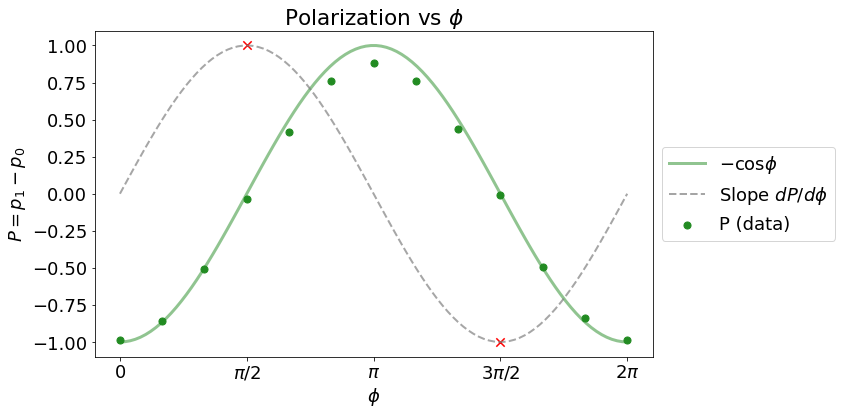

In [38]:
P = p1 - p0
phi = np.linspace(0, 2*np.pi, 13)

fig, ax = plt.subplots()
# plot polarization data
plt.scatter(phi, P, label="P (data)", s=50, color="forestgreen")

# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(phi_rad), lw=3, alpha=0.5, label="$-\cos{\phi}$", color="forestgreen")

# plot slope
plt.plot(phi_rad, np.sin(phi_rad), lw=2, alpha=0.7, label="Slope $dP/d\phi$", color="grey", linestyle="dashed")
# indicate where slope is maximum
extr_x = [np.pi/2, 3*np.pi/2]
extr_y = [1, -1]
plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("$P = p_1 - p_0$")
ax.set_xlabel("$\phi$")
plt.title("Polarization vs $\phi$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)

plt.show()

The red crosses mark where $P$ is the most sensitive to $\phi$ (slope = $\pm1$). At these points, $P=p_0-p_1=0$. <br>
We can zoom into the data near $\phi = \pi/2$ and center around it.

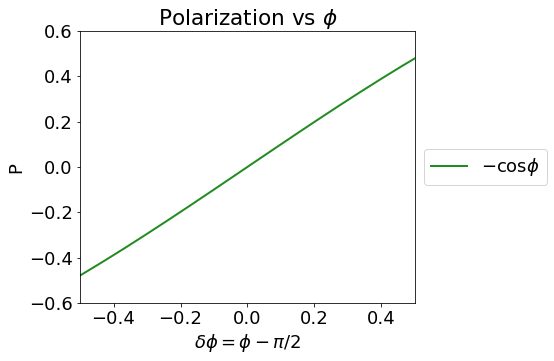

In [39]:
fig, ax = plt.subplots(figsize=(6,5))
dphi = phi_rad - np.pi/2 # delta_phi (shift from pi/2)

# plt.scatter(phi-np.pi/2, P, label="P (data)", s=50, color="purple")
# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(dphi, -np.cos(phi_rad), lw=2, label="$-\cos{\phi}$", color="forestgreen")

extr_x = [0]
extr_y = [1]
# plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("P")
ax.set_xlabel("$\delta\phi = \phi - \pi/2$")
plt.title("Polarization vs $\phi$")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.6,0.6])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## Inferring $\phi$ from data
From this plot, if we run an experiment and measure $P = 0.2$, we can use the purple line to infer what $\phi$ is! See an example below: 

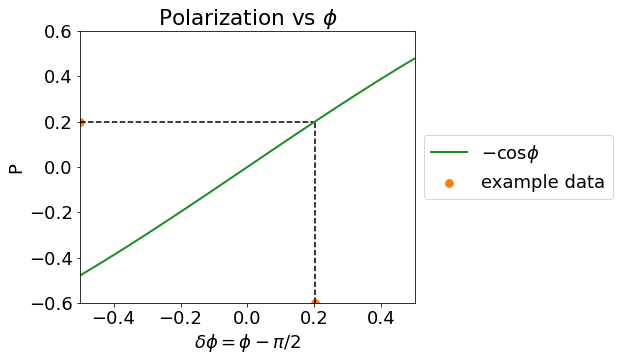

In [40]:
fig, ax = plt.subplots(figsize=(6,5))
dphi = phi_rad - np.pi/2 # delta_phi (shift from pi/2)

# plt.scatter(phi-np.pi/2, P, label="P (data)", s=50, color="purple")
# plot theoretical curves
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(dphi, -np.cos(phi_rad), lw=2, label="$-\cos{\phi}$", color="forestgreen")

extr_x = [0]
extr_y = [1]
# plt.scatter(extr_x, extr_y, color="r", marker="x", s=70)

ax.set_ylabel("P")
ax.set_xlabel("$\delta\phi = \phi - \pi/2$")
plt.title("Polarization vs $\phi$")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlim([-0.5,0.5])
ax.set_ylim([-0.6,0.6])

def inv_line(P):
    return -(np.arccos(P)-np.pi/2)

plt.scatter([-0.5,inv_line(0.2)], [0.2,-0.6], s=60, color="C1", label="example data")
plt.hlines(0.2, -0.5, inv_line(0.2), color="k", linestyles="dashed")
plt.vlines(inv_line(0.2), -0.6, 0.2, color="k", linestyles="dashed")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

By finding the inverse of the purple line -> we obtain $\delta\phi \approx 0.20$

In [41]:
# Linear function to approximate the cosine curve
# Fit the data
def func_pol(x, A, C):
    return -A * np.cos(np.pi/2 + x) + C

from scipy.optimize import curve_fit
guess = [1, 0]
params, covs = curve_fit(func_pol, phi-np.pi/2, P, p0=guess)

# Extract amplitude and offset from the manila fit
A, C = params
theta0 = 0

def calc_phi_fit_linear(P, A, C):
    return (1 / A) * (P - C)

In [42]:
A, C

(0.9318980741900044, -0.042047503541707366)

## Are we done here? No! Remember that experiments are about making the same measurements over and over.
We learned from the quantum circuit that even with the same $\phi$, we won't always get the same $p_0, p_1$ (and $P$). How can we be more certain about our results? We take A LOT of measurements to make sure!

In [43]:
# Reminder: 5 trials at the same phi(phi = pi/2) gave 5 different counts
num1[3, :] - num0[3, :]

array([-36., -70., -28., -64.,   6.])

In [44]:
# or in terms of polarization P
(num1[3, :] - num0[3, :]) / 1024

array([-0.03515625, -0.06835938, -0.02734375, -0.0625    ,  0.00585938])

### Load a new dataset (75 trials, unknown $\phi$)

In [45]:
# Load existing data
num0 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_0s_75Trials.csv", delimiter=",")
num1 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_1s_75Trials.csv", delimiter=",")

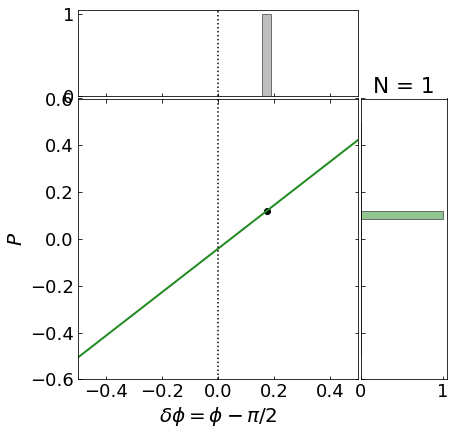

In [46]:
P = (num1 - num0) / 100 # polarization
phi_guess = calc_phi_fit_linear(P, A, C) # inverse the function to compute phi

N = 1 # a number from 1 to 75
y_2p = P[:N]
x_2p = phi_guess[:N]

# Add a straight line to plot
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6, 6))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_scatter.plot(dphi, -np.cos(dphi + np.pi/2), color="forestgreen", lw=2)
ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)
ax_scatter.scatter(x_2p, y_2p, color="k")

# xticks = [0, np.pi / 2, np.pi]
# xticklabels = ['$0$', '$\pi / 2$', '$\pi$']
# plt.xticks(xticks, xticklabels)
ax_scatter.set_ylim([-0.6, 0.6])
ax_scatter.set_xlim([-0.5, 0.5])
ax_scatter.set_xlabel(r"$\delta\phi = \phi-\pi/2$", fontsize=20)
ax_scatter.set_ylabel(r"$P$", fontsize=20)

ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/2$")
# ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.5, 0.5, 30)
ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')
ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.5, 0.5, 30)
ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
# ax_histy.axhline(y=0, color="k", ls=':')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.title(f"N = {N}")

plt.show()

<IPython.core.display.Javascript object>


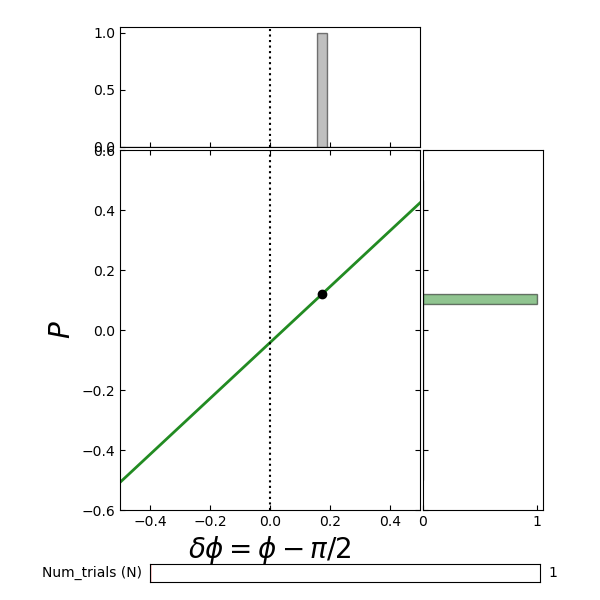

In [136]:
%matplotlib notebook
from matplotlib.widgets import Slider, Button

P = (num1 - num0) / 100 # polarization
phi_guess = calc_phi_fit_linear(P, A, C) # inverse the function to compute phi

# Add a straight line to plot
# definitions for the axes
left, width = 0.2, 0.5
bottom, height = 0.15, 0.6
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6,6))
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.5)

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_scatter.plot(dphi, -np.cos(dphi + np.pi/2), color="forestgreen", lw=2)
ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)

ax_scatter.set_ylim([-0.6, 0.6])
ax_scatter.set_xlim([-0.5, 0.5])
ax_scatter.set_xlabel(r"$\delta\phi = \phi-\pi/2$", fontsize=20)
ax_scatter.set_ylabel(r"$P$", fontsize=20)

ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/2$")
# ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.5, 0.5, 30)
ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.5, 0.5, 30)
# ax_histy.axhline(y=0, color="k", ls=':')
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

N_init = 1
y_2p = P[:N_init]
x_2p = phi_guess[:N_init]
ax_scatter.plot(x_2p, y_2p, "ko")
ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')

# Make a horizontal slider to control N
ax_slider = fig.add_axes([0.25, 0.03, 0.65, 0.03])
Nslider = Slider(
    ax=ax_slider,
    label='Num_trials (N)',
    valmin=1,
    valmax=75,
    valinit=N_init,
    valstep=1,
)
    
def update(val):
    N = Nslider.val
    y_2p = P[:N]
    x_2p = phi_guess[:N]
    
    ax_scatter.clear()
    ax_scatter.set_ylim([-0.6, 0.6])
    ax_scatter.set_xlim([-0.5, 0.5])
    ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2)
    ax_scatter.plot(x_2p, y_2p, "ko")
    
    ax_histy.clear()
    ax_histy.hist(y_2p, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='forestgreen')
    
    ax_histx.clear()
    ax_histx.hist(x_2p, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')
    ax_scatter.axvline(x=np.mean(x_2p), color="k", ls=":")
    ax_histx.axvline(x=np.mean(x_2p), color="k", ls=":")
    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    
    fig.canvas.draw_idle()

# register the update function with each slider
Nslider.on_changed(update)

plt.show()

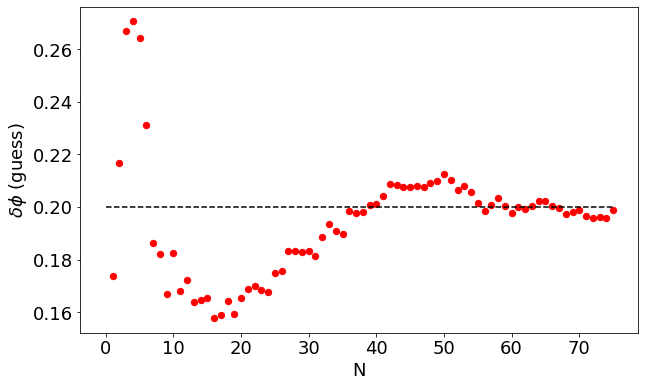

In [17]:
means = []
SD = []

for N in range(1, 76):
    means.append(np.mean(phi_guess[:N]))
    SD.append(np.std(phi_guess[:N]))

fig, ax = plt.subplots()
plt.scatter(np.arange(1,76), means, marker="o", color="r", s=40, label="mean")
# plt.scatter(np.arange(1,76), SD, marker="s", color="C0", s=40, label="SD")

plt.hlines(0.2, 0, 75, color="k", linestyles="dashed")
ax.set_xlabel("N")
ax.set_ylabel("$\delta\phi$ (guess)")
plt.title("")
# plt.legend()
plt.show()

# Repeat with two qubits
For two qubits, there are four possible output states: `00`, `11`, `01`, `10`. We define a new parameter, parity $\Pi = p_{00} + p_{11} - p_{10} - p_{01}$. We plot $\Pi$ as a function of $\phi$ below:

In [18]:
# Load existing data - 1qubit
num0 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_0s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num1 = np.loadtxt("./Demo_data/1-Qubit/13angles/Num_1s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
P1 = np.mean((num1-num0) / 1024, axis=1) #1-qubit polarization

# Load data - 2qubit
num00 = np.loadtxt("./Demo_data/2-Qubit/13angles/Num_00s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num01 = np.loadtxt("./Demo_data/2-Qubit/13angles/Num_01s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num10 = np.loadtxt("./Demo_data/2-Qubit/13angles/Num_10s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
num11 = np.loadtxt("./Demo_data/2-Qubit/13angles/Num_11s_5Trials_13angles_manila.csv", delimiter=",").reshape((13, 5))
Pa2 = np.mean((num00 + num11 - num01 - num10) / 1024, axis=1)

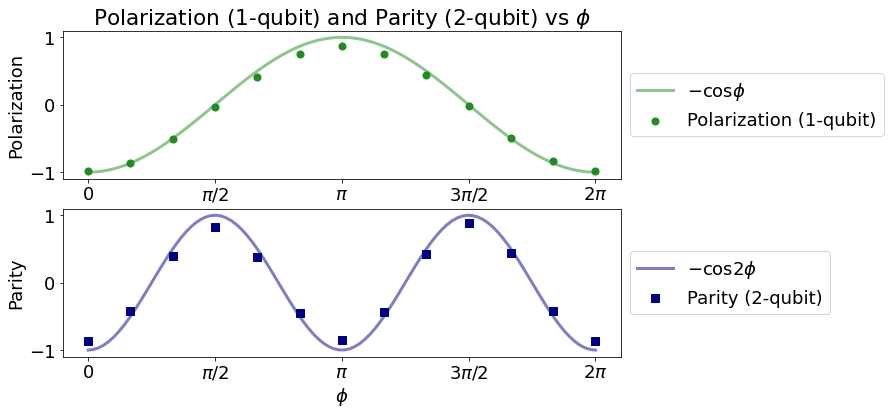

In [19]:
ax = plt.subplot(2, 1, 1)
# plot polarization data: 1-qubit
plt.scatter(phi, P1, label="Polarization (1-qubit)", s=50, color="forestgreen")
# plot theoretical curves: 1-qubit
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(phi_rad), lw=3, alpha=0.5, label="$-\cos{\phi}$", color="forestgreen")

plt.title("Polarization (1-qubit) and Parity (2-qubit) vs $\phi$")
xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)
ax.set_xlabel("$\phi$")
ax.set_ylabel("Polarization")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(2, 1, 2)
# plot polarization data: 2-qubit
plt.scatter(phi, Pa2, label="Parity (2-qubit)", s=50, color="navy", marker="s")
# plot theoretical curves: 2-qubit
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(2*phi_rad), lw=3, alpha=0.5, label="$-\cos{2\phi}$", color="navy")
ax2.set_ylabel("Parity")
plt.xticks(xticks, ticklabels)
ax2.set_xlabel("$\phi$")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

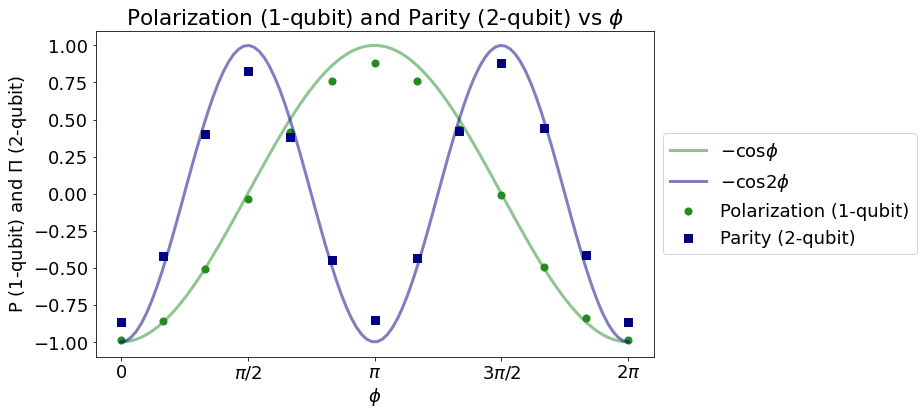

In [20]:
fig, ax = plt.subplots()
# plot polarization data: 1-qubit
plt.scatter(phi, P1, label="Polarization (1-qubit)", s=50, color="forestgreen")
# plot theoretical curves: 1-qubit
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(phi_rad), lw=3, alpha=0.5, label="$-\cos{\phi}$", color="forestgreen")

plt.title("Polarization (1-qubit) and Parity (2-qubit) vs $\phi$")
xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2 * np.pi]
ticklabels = ['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
plt.xticks(xticks, ticklabels)
ax.set_xlabel("$\phi$")
# ax.set_ylabel("Polarization")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plot polarization data: 2-qubit
plt.scatter(phi, Pa2, label="Parity (2-qubit)", s=50, color="navy", marker="s")
# plot theoretical curves: 2-qubit
phi_rad = np.linspace(0, 2 * np.pi, 100)
plt.plot(phi_rad, -np.cos(2*phi_rad), lw=3, alpha=0.5, label="$-\cos{2\phi}$", color="navy")
ax.set_ylabel("P (1-qubit) and $\Pi$ (2-qubit)")
plt.xticks(xticks, ticklabels)
ax.set_xlabel("$\phi$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Plotting both polarization (from 1-qubit data) and parity (from 2-qubit data) on the same axes show that the 2-qubit measurement has steeper slopes -> higher sensitivity to $\phi$

In [21]:
# Linear function to approximate the cosine curve
# Fit the data
def func_parity(x, A, C):
    return -A * np.cos(2 * (np.pi/4 + x)) + C

from scipy.optimize import curve_fit
guess = [1, 0]
params2, covs = curve_fit(func_parity, phi-np.pi/4, Pa2, p0=guess)

# Extract amplitude and offset from the manila fit
A2, C2 = params2
theta0 = 0

def calc_phi2_fit_linear(Pa, A, C):
    return (Pa - C) / (2*A)

In [22]:
A, C

(0.9318980741900044, -0.042047503541707366)

In [23]:
A2, C2

(0.8523763019955126, -0.006998697919630199)

## How can two entangled qubits enhance sensitivity?

In [24]:
# Load existing data - 1qubit
num0 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_0s_75Trials.csv", delimiter=",")
num1 = np.loadtxt("./Demo_data/1-Qubit/Sensitivity/Num_1s_75Trials.csv", delimiter=",")
P1 = (num1 - num0) / 100 #1-qubit polarization

# Load data - 2qubit
num00 = np.loadtxt("./Demo_data/2-Qubit/Sensitivity/Angle_Sensitivity_0.2_Num_00s_75Trials_50Shots_manila.csv", delimiter=",")
num01 = np.loadtxt("./Demo_data/2-Qubit/Sensitivity/Angle_Sensitivity_0.2_Num_01s_75Trials_50Shots_manila.csv", delimiter=",")
num10 = np.loadtxt("./Demo_data/2-Qubit/Sensitivity/Angle_Sensitivity_0.2_Num_10s_75Trials_50Shots_manila.csv", delimiter=",")
num11 = np.loadtxt("./Demo_data/2-Qubit/Sensitivity/Angle_Sensitivity_0.2_Num_11s_75Trials_50Shots_manila.csv", delimiter=",")
Pa2 = (num00 + num11 - num01 - num10) / 50

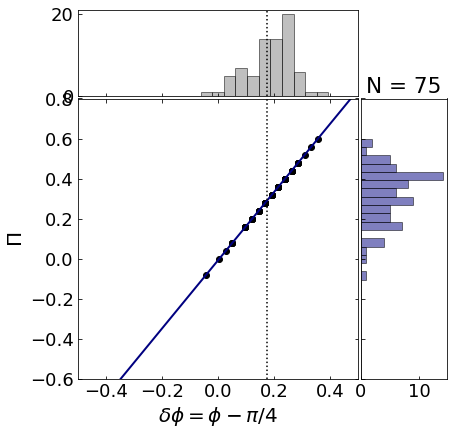

In [25]:
phi_guess_1 = calc_phi_fit_linear(P1, A, C)
phi_guess_2 = calc_phi2_fit_linear(Pa2, A2, C2)

N = 75 # a number from 1 to 75
x1 = P1[:N] # polarization
y2 = phi_guess_1[:N] # phi inferred

y2 = Pa2[:N] # parity
x2 = phi_guess_2[:N] # phi inferred

# Add a straight line to plot
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6, 6))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
# ax_scatter.plot(dphi, -np.cos(dphi + np.pi/2), color="forestgreen", lw=2)
dphi = phi - np.pi / 4
ax_scatter.plot(dphi, 2*A2*dphi + C2, color="navy", lw=2)
ax_scatter.scatter(x2, y2, color="k")

# xticks = [0, np.pi / 2, np.pi]
# xticklabels = ['$0$', '$\pi / 2$', '$\pi$']
# plt.xticks(xticks, xticklabels)
ax_scatter.set_ylim([-0.6, 0.8])
ax_scatter.set_xlim([-0.5, 0.5])
ax_scatter.set_xlabel(r"$\delta\phi = \phi-\pi/4$", fontsize=20)
ax_scatter.set_ylabel(r"$\Pi$", fontsize=20)

# ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/4$")
# ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.6, 0.6, 30)
ax_histx.hist(x2, bins=bins_angle, alpha=0.5, \
              lw=1, ec='k', fc='grey')
# ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.6, 0.6, 30)
ax_histy.hist(y2, bins=bins_p1, orientation='horizontal', alpha=0.5, \
              lw=1, ec='k', fc='navy')
# ax_histy.axhline(y=0, color="k", ls=':')

ax_scatter.axvline(x=np.mean(x_2p), color="k", ls=":")
ax_histx.axvline(x=np.mean(x_2p), color="k", ls=":")
    
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.title(f"N = {N}")

plt.show()

## Compare with 1-qubit sensitivity

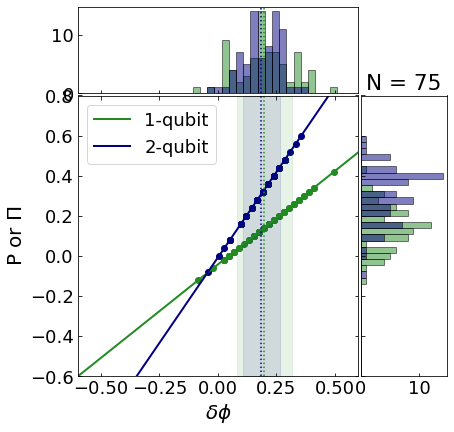

In [60]:
phi_guess_1 = calc_phi_fit_linear(P1, A, C)
phi_guess_2 = calc_phi2_fit_linear(Pa2, A2, C2)

N = 75 # a number from 1 to 75
y1 = P1[:N] # polarization
x1 = phi_guess_1[:N] # phi inferred

y2 = Pa2[:N] # parity
x2 = phi_guess_2[:N] # phi inferred

# Add a straight line to plot
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
fig = plt.figure(figsize=(6, 6))
ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)

# 1-qubit
dphi = phi-np.pi/2
ax_scatter.plot(dphi, A*dphi + C, color="forestgreen", lw=2, label="1-qubit")
ax_scatter.scatter(x1, y1, color="forestgreen")

# 2-qubit
ax_scatter.plot(phi-np.pi/4, 2*A2*(phi-np.pi/4) + C2, color="navy", lw=2, label="2-qubit")
ax_scatter.scatter(x2, y2, color="navy")

# xticks = [0, np.pi / 2, np.pi]
# xticklabels = ['$0$', '$\pi / 2$', '$\pi$']
# plt.xticks(xticks, xticklabels)
ax_scatter.set_ylim([-0.6, 0.8])
ax_scatter.set_xlim([-0.6, 0.6])
ax_scatter.set_xlabel(r"$\delta\phi$", fontsize=20)
ax_scatter.set_ylabel(r"P or $\Pi$", fontsize=20)

# ax_scatter.axvline(x=0, color="k", ls=":", label="$\phi = \pi/4$")
# ax_scatter.axhline(y=0, color="k", ls=":")

# Histogram (phi)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot angle histogram (along x)
bins_angle = np.linspace(-0.6, 0.6, 40)
ax_histx.hist(x1, bins=bins_angle, alpha=0.5, lw=1, ec='k', fc='forestgreen')
ax_histx.hist(x2, bins=bins_angle, alpha=0.5, lw=1, ec='k', fc='navy')
# ax_histx.axvline(x=0, color="k", ls=':')

# plot p_1 histogram (along y)
bins_p1 = np.linspace(-0.6, 0.6, 40)
ax_histy.hist(y1, bins=bins_p1, orientation='horizontal', alpha=0.5, lw=1, ec='k', fc='forestgreen')
ax_histy.hist(y2, bins=bins_p1, orientation='horizontal', alpha=0.5, lw=1, ec='k', fc='navy')

ax_scatter.axvline(x=np.mean(x1), color="forestgreen", ls=":")
ax_histx.axvline(x=np.mean(x1), color="forestgreen", ls=":")

ax_scatter.axvline(x=np.mean(x2), color="navy", ls=":")
ax_histx.axvline(x=np.mean(x2), color="navy", ls=":")
    
ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

# Fill 
y = np.linspace(-0.6, 0.8, 50)
mean1, sd1 = np.mean(phi_guess_1), np.std(phi_guess_1)
mean2, sd2 = np.mean(phi_guess_2), np.std(phi_guess_2)
ax_scatter.fill_betweenx(y, mean1-sd1, mean1+sd1, color="forestgreen", alpha=0.1)
ax_scatter.fill_betweenx(y, mean2-sd2, mean2+sd2, color="navy", alpha=0.1)
# ax_scatter.fill_betweenx(y, x1, x2=0, where=None, step=None, interpolate=False, *, data=None, **kwargs)[source]

plt.title(f"N = {N}")
ax_scatter.legend()

plt.show()

### Notes for Eric
* I tried adding two-qubit data to the same plot but the difference in histogram widths isn't that visible (factor of $\sqrt{2}$ difference is hard to see)
* So I shaded the area to represent $\delta\phi \pm$ S.D. in each case to show that the navy "box" is narrower
* Note that $\delta_\phi$ for 1-qubit is the shift around $\pi/2$ and for the 2-qubit is the shift around $\pi/4$

In [26]:
np.mean(phi_guess_1), np.std(phi_guess_1), np.mean(phi_guess_2), np.std(phi_guess_2)

(0.19878515545031303,
 0.11586812394154904,
 0.18587175866133185,
 0.07881358560509678)

In [29]:
A, C

(0.9318980741900044, -0.042047503541707366)

In [30]:
A2, C2

(0.8523763019955126, -0.006998697919630199)